In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def read_rewards(filepath):
    x = []
    with open(filepath, "rb") as openfile:
        while True:
            try:
                x.append(pickle.load(openfile))
            except EOFError:
                break
    return x

In [2]:
def _plot(ax, exp_name, _dir, _legends,
          runs=10, legend=False, color='black',
          stop_th=10000, _mod=1, yticks=None,
          xticks=None, nb_walker=1, _linewidth=4,
          _alpha=0.2, _loc=(.0, 1.05), eval_reward_p='evaluation_rewards2'):

    epis_reward_p = 'episodic_rewards'
    # all_times_p = 'all_times'

    r_episodic_s = []
    r_eval_s = []
    # times = []

    for seed in range(0, runs):

        epis_filepath = f'{_dir}/{exp_name}/{epis_reward_p}/seed_{seed}.pkl'
        eval_filepath = f'{_dir}/{exp_name}/{eval_reward_p}/seed_{seed}.pkl'
        # all_times_filepath = f'{_dir}/{exp_name}/{all_times_p}/seed_{seed}.pkl'

        if 'facmac' in epis_filepath:
            r_episodic = read_rewards(epis_filepath)[::_mod]
            r_e = read_rewards(eval_filepath)
            r_eval = r_e[::_mod]

            if nb_walker==2:
                r_eval = np.sum(np.array(r_eval)[:,(0,2)], axis=1).tolist() # all rewards from facmac
            if nb_walker==1:
                r_eval.append(r_e[-1])
                r_eval = np.array(r_eval)[:,0].tolist()
        else:
            r_episodic = read_rewards(epis_filepath)[0][::_mod]
            r_eval = read_rewards(eval_filepath)[::_mod]

        r_episodic = [i for item in r_episodic for i in item]
        r_episodic_s.append(r_episodic)
        r_eval_s.append(r_eval)


    evaluation_rewards = np.array(r_eval_s)


    _r = np.mean(evaluation_rewards, axis=0)
    _r_stds = np.std(evaluation_rewards, axis=0)

    # _mod 6 from reward calc
    if _dir=='4A2W':
        # _mod 6 from reward saving
        xs = [i * stop_th * 6 for i in range(_r.shape[0])]
    elif _dir=='2A1W':
        # _mod 4 from reward saving
        xs = [i * stop_th * 4 for i in range(_r.shape[0])]
    else:
        assert 'error'

    lines= ax.plot(xs, _r, label=_legends, linewidth=_linewidth)

    lines[0].set_color(color)
    ax.fill_between(xs,
                    (_r - (_r_stds * 1.96) / np.sqrt(nb_version)),
                    (_r + (_r_stds * 1.96) / np.sqrt(nb_version)),
                    color=lines[0].get_color(), alpha=_alpha)
    if legend:

        leg = ax.legend(shadow=False, fancybox=True, loc=_loc, ncol=4)
        _line_size = len(leg.get_lines())
        for i, line in enumerate(leg.get_lines()):
            if i == _line_size - 1 or i == _line_size-2:
                line.set_linewidth(20.0)
            else:
                line.set_linewidth(10.0)

    ax.set_ylabel('Average Team Reward')
    ax.set_xlabel('Step #')

    print(_legends, _r[-1])

    if yticks:
        ax.set_yticks(yticks)
    if xticks:
        ax.set_xticks(xticks)

CQF 59.550115020936595
CDDPG -18.902090344462966
IQF 86.56074605372004
IDDPG -4.880789724549489
MADDPG-Ind -57.582812016292074
MADDPG-Team -23.255516849897866
FACMAC 74.42173538391867
MQF 89.13293301019218
---------------------------------------------------------
CQF -79.23826822102592
CDDPG 32.79422855158639
IQF -4.7003768230180665
IDDPG 33.56321971085022
MADDPG-Ind -146.89362692472724
MADDPG-Team 17.339313497717406
FACMAC 64.48996424956871
MQF 98.44376333240466


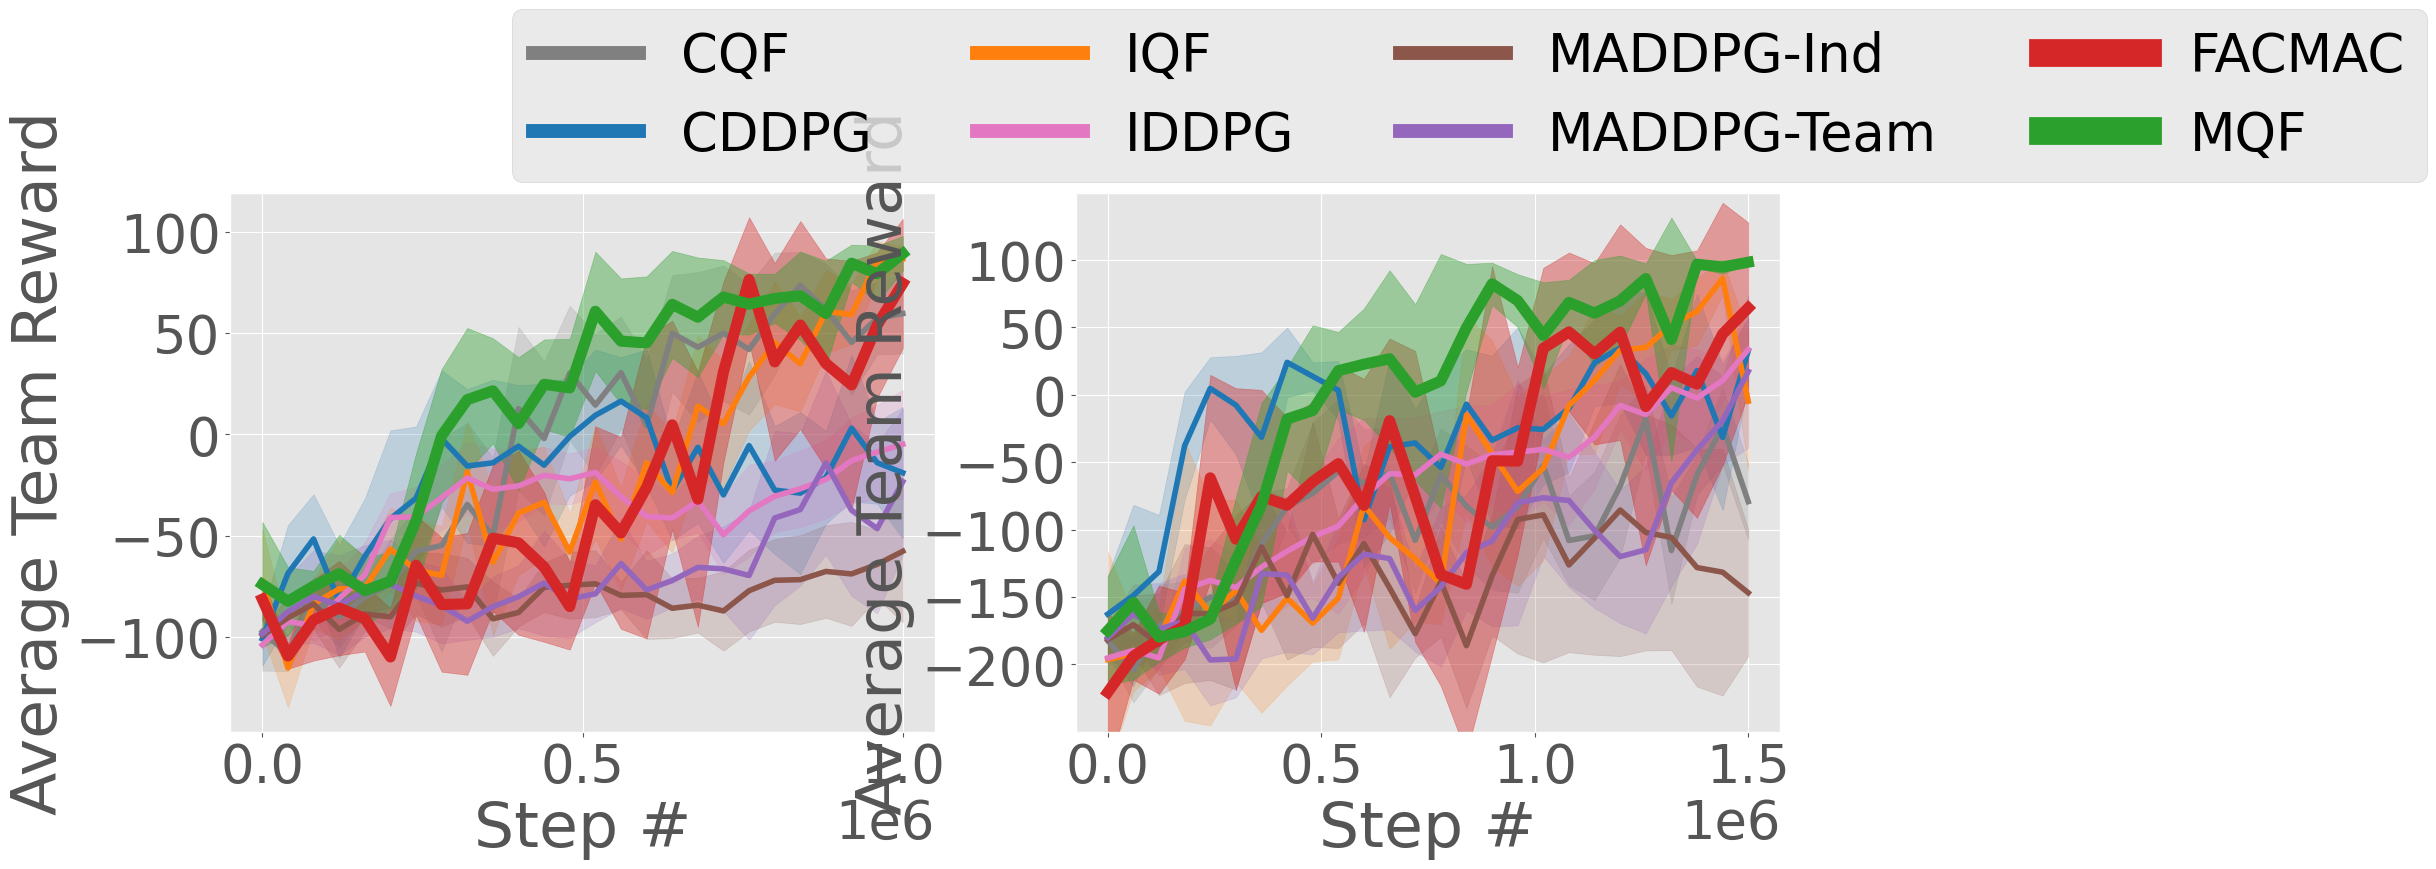

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(40,15))
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 38})
ax[1].set_ylim(ymin=-250, ymax=150)

mix_keyword = 'mix_sum_run_50-step-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-20000_lr0001_b512_l2_g099_n256_m500000'
ind_keyword = 'ind_run_50-step-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-20000_lr0001_b512_l2_g099_n256_m500000'
cent_keyword = 'centralized_run_50-step-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-20000_lr0001_b512_l2_g099_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_episode-20000_lr0001_tlr001_b512_l2_g099_n256_m500000'
cddpg_keyword_10 = 'cddpg_run_10-step-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_episode-20000_lr25e-05_b512_l2_g099_n256_m500000'
iddpg_keyword_10 = 'iddpg_run_10-step-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_episode-20000_lr25e-05_b512_l2_g099_n256_m500000'
facmac='facmac_run_2-nb-update_nb-walkers-1_terrain-length-30_forward-reward-5_me-len-500_episode-20000_lr001_b512_l3_g099_n256_m500000'
nb_version = 10
fixed_b = -5


_plot(ax[0], cent_keyword,
      _legends='CQF', runs=nb_version,
      _dir='2A1W', color='#808080')

_plot(ax[0], cddpg_keyword_10,
      _legends='CDDPG', runs=nb_version,
      _dir='2A1W', color='#1F77B4')

_plot(ax[0], ind_keyword,
      _legends='IQF', runs=nb_version,
      _dir='2A1W', color='#FF7F0E')

_plot(ax[0], iddpg_keyword_10,
      _legends='IDDPG', runs=nb_version,
      _dir='2A1W', color='#E377C2')

_plot(ax[0], maddpg_keyword_50.replace('r_type', 'individual-reward'),
      _legends='MADDPG-Ind', runs=nb_version,
      _dir='2A1W', color='#8C564B')

_plot(ax[0], maddpg_keyword_50.replace('r_type', 'team-reward'),
      _legends='MADDPG-Team', runs=nb_version,
      _dir='2A1W', color='#9467BD')

_mod = 4
_plot(ax[0], facmac, _mod=_mod, eval_reward_p='evaluation_rewards',
      _legends='FACMAC', runs=nb_version,
      _dir='2A1W', color='#D62728',
      _linewidth=8, _alpha=0.4)

_plot(ax[0], mix_keyword,
      _legends='MQF', runs=nb_version,
      _dir='2A1W', color='#2CA02C',
       yticks=[-100, -50, 0, 50, 100], _linewidth=8, _alpha=0.4)

print('---------------------------------------------------------')

mix_keyword = 'mix_sum_run_50-step-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-30000_lr0001_b512_l2_g099_n256_m500000'
ind_keyword = 'ind_run_50-step-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-30000_lr0001_b512_l2_g099_n256_m500000'
cent_keyword = 'centralized_run_50-step-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_func-polynomial_rank-2_episode-30000_lr0001_b256_l2_g099_n256_m500000'
maddpg_keyword_50 = 'maddpg_run_50-step-update_r_type_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_episode-30000_lr0001_tlr001_b512_l2_g099_n256_m500000'
cddpg_keyword_10 = 'cddpg_run_10-step-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_episode-30000_lr25e-05_b512_l2_g099_n256_m500000'
iddpg_keyword_10 = 'iddpg_run_10-step-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_episode-30000_lr25e-05_b512_l2_g099_n256_m500000'
facmac='facmac_run_2-nb-update_nb-walkers-2_terrain-length-30_forward-reward-5_me-len-500_episode-30000_lr001_b512_l3_g099_n256_m500000'

nb_version = 5
walker = 2

_plot(ax[1], cent_keyword,
      _legends='CQF', runs=nb_version,
      _dir='4A2W', color='#808080', nb_walker=walker)

_plot(ax[1], cddpg_keyword_10,
      _legends='CDDPG', runs=nb_version,
      _dir='4A2W', color='#1F77B4', nb_walker=walker)

_plot(ax[1], ind_keyword,
      _legends='IQF', runs=nb_version,
      _dir='4A2W', color='#FF7F0E', nb_walker=walker)

_plot(ax[1], iddpg_keyword_10,
      _legends='IDDPG', runs=nb_version,
      _dir='4A2W', color='#E377C2', nb_walker=walker)

_plot(ax[1], maddpg_keyword_50.replace('r_type', 'individual-reward'),
      _legends='MADDPG-Ind', runs=nb_version,
      _dir='4A2W', color='#8C564B', nb_walker=walker)

_plot(ax[1], maddpg_keyword_50.replace('r_type', 'team-reward'),
      _legends='MADDPG-Team', runs=nb_version,
      _dir='4A2W', color='#9467BD', nb_walker=walker)

_plot(ax[1], facmac, eval_reward_p='evaluation_rewards',
      _legends='FACMAC', runs=nb_version,
      _dir='4A2W', color='#D62728', nb_walker=walker,
      _linewidth=8, _alpha=0.4)

# _loc=(-1.4, 1.02)
_plot(ax[1], mix_keyword,
      _legends='MQF', runs=nb_version,
      _dir='4A2W', color='#2CA02C', nb_walker=walker,
      _loc=(-0.8, 1.02), legend=True, yticks=[-200, -150, -100, -50, 0, 50, 100],
      _linewidth=8, _alpha=0.4)



In [5]:
fig.savefig('fig-2.svg')